<a href="https://colab.research.google.com/github/chanilkim/chanilkim.github.io/blob/main/%EB%B2%A0%EC%9D%B4%EC%8A%A4%EB%9D%BC%EC%9D%B8_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로딩

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

## 데이터 로딩 및 확인

In [82]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


## 결측치 확인 및 처리

In [7]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [8]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [9]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

## 모델 정의 및 학습

In [10]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [11]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

## 학습 된 모델로 예측 데이터 생성

In [12]:
pred = model.predict(test)

## 제출파일 생성

In [13]:
submission = pd.read_csv('/content/data/submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [14]:
submission['count'] = pred

In [15]:
submission

,id,count
0,0,94.45
1,1,234.80
2,2,90.70
3,4,30.14
4,5,63.15
...,...,...
710,2148,54.57
711,2149,65.82
712,2165,124.93
713,2166,160.40


In [16]:
submission.to_csv('베이스라인.csv',index = False)

In [17]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [18]:
train=pd.read_csv("data/train.csv")


In [20]:
train.groupby(['hour'])['count'].mean()


hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

Text(16, 150, 'leave work')

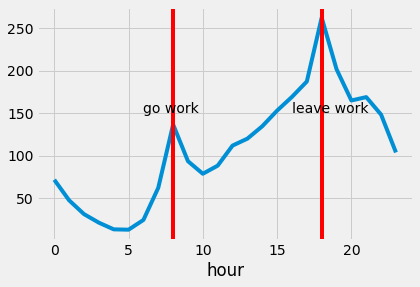

In [21]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

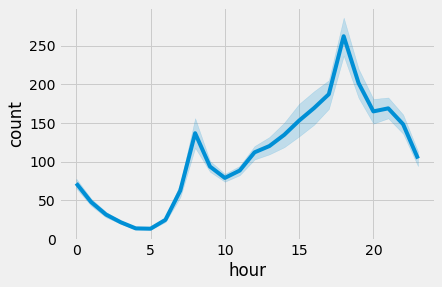

In [26]:
sns.lineplot('hour','count',data=train)

In [43]:
xf = train.corr()

In [70]:
xf.index[0]
train.columns.values.tolist()

['id',
 'hour',
 'hour_bef_temperature',
 'hour_bef_precipitation',
 'hour_bef_windspeed',
 'hour_bef_humidity',
 'hour_bef_visibility',
 'hour_bef_ozone',
 'hour_bef_pm10',
 'hour_bef_pm2.5',
 'count']

['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']


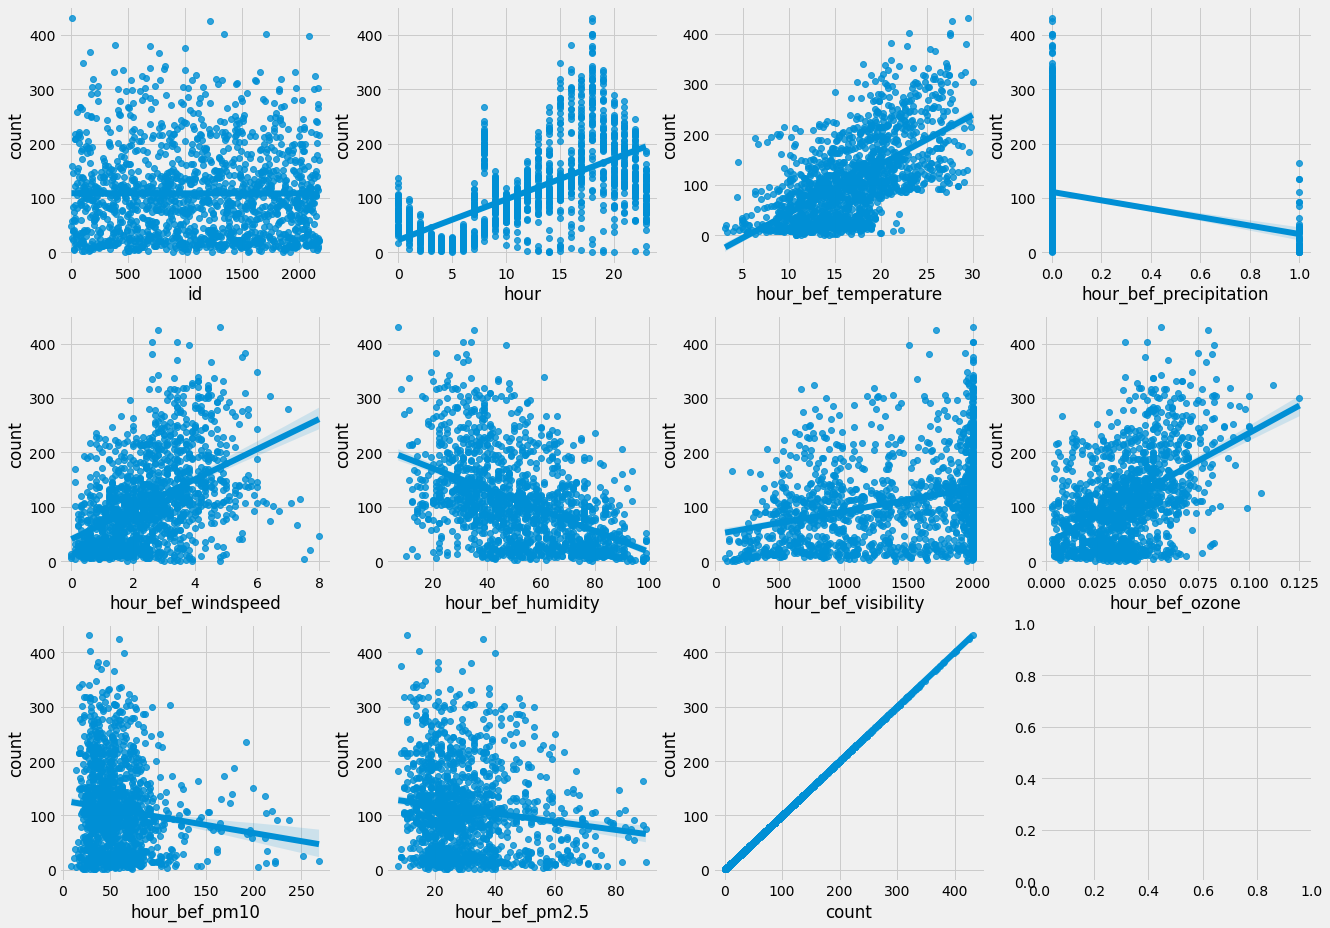

In [83]:
f,ax = plt.subplots(3,4, figsize=(20,15))


data_list=train.columns.values.tolist()
print(data_list)

x_list=[0,0,0,0,1,1,1]
y_list=[0,1,2,3,0,1,2]


for i in range(len(data_list)):
  sns.regplot(data_list[i],
             'count',
             data=train,
             ax=ax[ i//4 , i%4 ])

  # ax[ i//4 , i%4 ].set_title( data_list[i] )

['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']


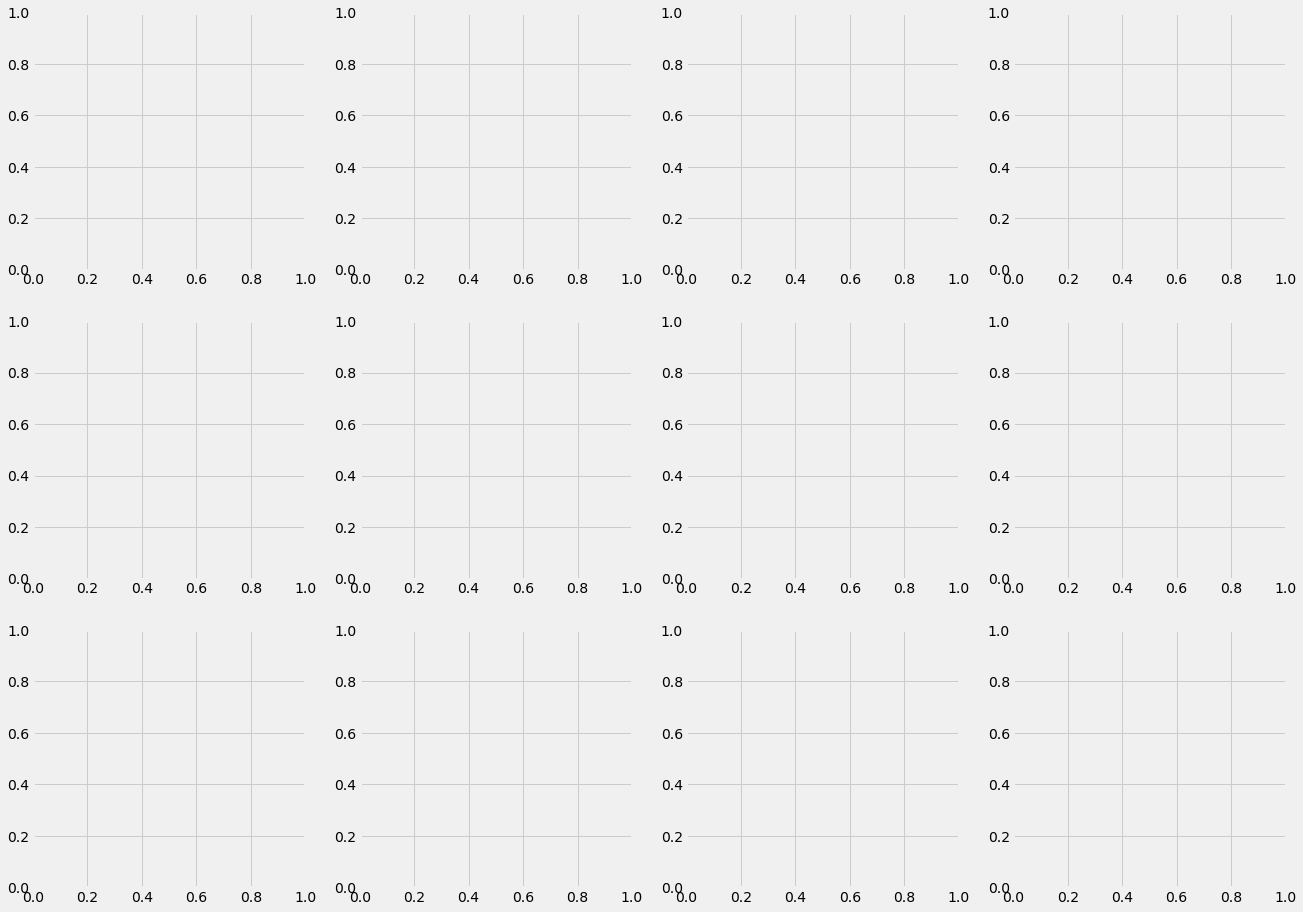

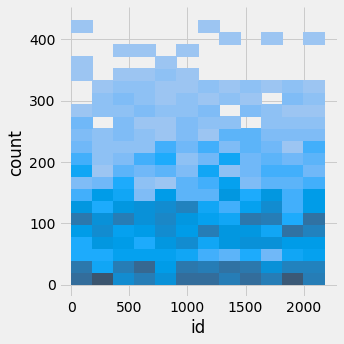

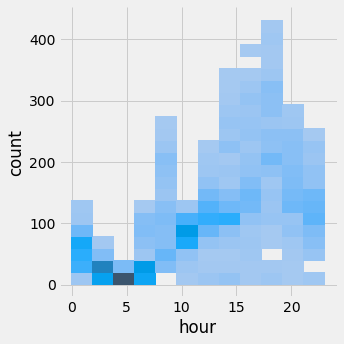

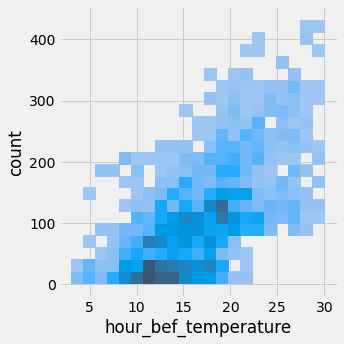

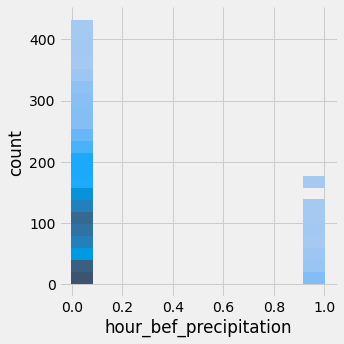

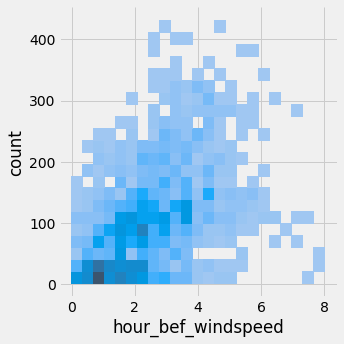

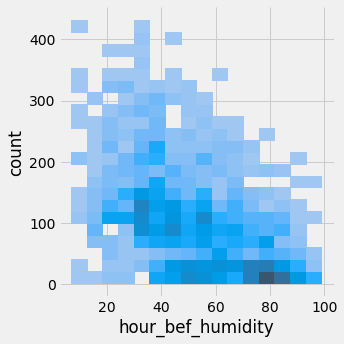

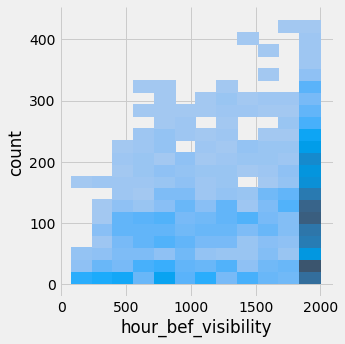

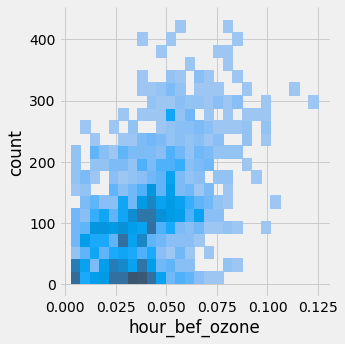

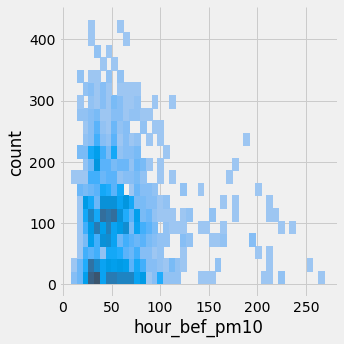

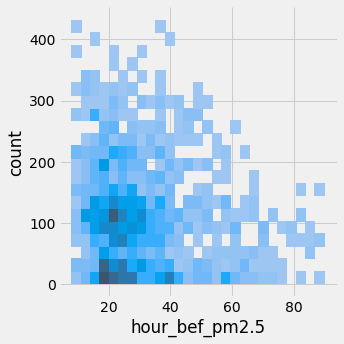

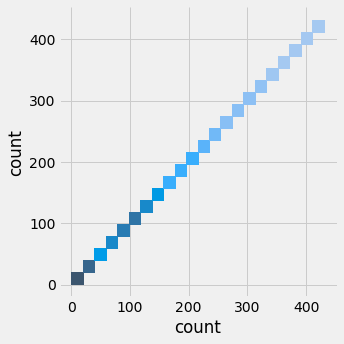

In [93]:
f,ax = plt.subplots(3,4, figsize=(20,15))


data_list=train.columns.values.tolist()
print(data_list)

x_list=[0,0,0,0,1,1,1]
y_list=[0,1,2,3,0,1,2]


for i in range(len(data_list)):
  sns.displot(x = data_list[i],
             y = 'count',
             data=train,
             ax=ax[ i//4 , i%4 ])

  # ax[ i//4 , i%4 ].set_title( data_list[i] )

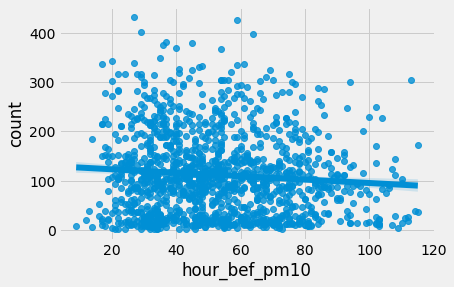

In [80]:
# sns.scatterplot('hour_bef_pm10',
#             'count',
#             data=train)

mod_data = train
q1=train['hour_bef_pm10'].quantile(0.25)
q3=train['hour_bef_pm10'].quantile(0.75)
iqr=q3-q1

condition=train['hour_bef_pm10']>q3+1.5*iqr
a=mod_data[condition].index
mod_data.drop(a,inplace=True)

sns.regplot('hour_bef_pm10','count',data=mod_data)

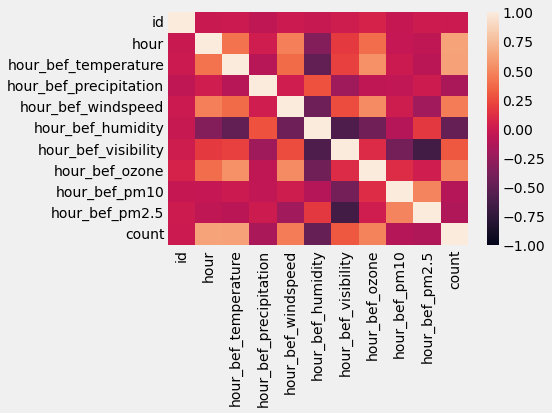

In [52]:
sns.heatmap(xf,vmin=-1,vmax=1)